# Lab | Handling Data Imbalance in Classification Models

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type.
- Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    - Scale the features either by using normalizer or a standard scaler.
    - Split the data into a training set and a test set.
    - Fit a logistic regression model on the training data.
    - Check the accuracy on the test data.
    
Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and -downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Read the Dataset

In [2]:
df = pd.read_csv('files_for_lab/Customer-Churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


# 3. Data Overview

In [3]:
df.shape

(7043, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

# 4. Data Preprocessing

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
median_value = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_value, inplace=True)

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


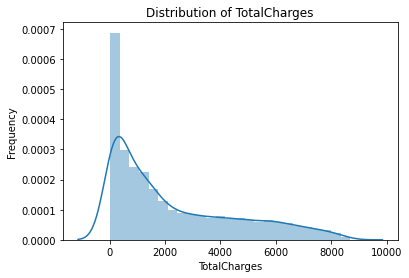

In [7]:
sns.distplot(df['TotalCharges'])
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

# 5. Data Modelling

In [9]:
X = df[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
y = df['Churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.93      0.88      1036
         Yes       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



In [10]:
y_train.value_counts()

No     4138
Yes    1496
Name: Churn, dtype: int64

In [11]:
from imblearn.over_sampling import RandomOverSampler

X = df[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
y = df['Churn'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)


model_ros = LogisticRegression()
model_ros.fit(X_train_ros, y_train_ros)

y_pred_ros = model_ros.predict(X_test)
print("Classification Report after Random OverSampling:")
print(classification_report(y_test, y_pred_ros))

Classification Report after Random OverSampling:
              precision    recall  f1-score   support

          No       0.90      0.73      0.81      1036
         Yes       0.51      0.77      0.61       373

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



In [12]:
y_train_ros.value_counts()

No     4138
Yes    4138
Name: Churn, dtype: int64

In [13]:
from imblearn.under_sampling import RandomUnderSampler

X = df[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
y = df['Churn'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model_rus = LogisticRegression()
model_rus.fit(X_train_rus, y_train_rus)


y_pred_rus = model_rus.predict(X_test)
print("Classification Report after Random UnderSampling:")
print(classification_report(y_test, y_pred_rus))

Classification Report after Random UnderSampling:
              precision    recall  f1-score   support

          No       0.90      0.74      0.81      1036
         Yes       0.51      0.77      0.61       373

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



In [14]:
y_train_rus.value_counts()

No     1496
Yes    1496
Name: Churn, dtype: int64